In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('DataA.csv', index_col=0)
data_orig = data.copy()
print(data.shape)
display(data.head(5))

(19000, 81)


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,-587.0,810.0,902.0,-140.0,-468.0,-28.0,1016.0,-191.0,358.0,895.0,-189.0,-511.0,-782.0,-212.0,-241.0,472.0,938.0,-882.0,-61.0,543.0,141.0,-150.0,965.0,NaN,NaN,NaN,-989.0,-158.0,41.0,78.0,-49.0,-13.0,643.0,104.0,924.0,-717.0,62.0,-691.0,63.0,-268.0,937.0,217.0,-249.0,29.0,-141.0,-469.0,-571.0,292.0,-314.0,-84.0,-624.0,-711.0,761.0,-63.0,583.0,254.0,101.0,-205.0,-156.0,631.0,-163.0,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,-605.0,835.0,897.0,-136.0,-473.0,-38.0,989.0,-160.0,346.0,889.0,-215.0,-609.0,-773.0,-202.0,-255.0,509.0,934.0,-878.0,-50.0,515.0,130.0,-179.0,995.0,NaN,NaN,NaN,-991.0,-157.0,43.0,48.0,-85.0,1.0,644.0,107.0,922.0,-718.0,61.0,-690.0,63.0,-273.0,925.0,214.0,-344.0,45.0,-134.0,-469.0,-578.0,285.0,-316.0,-80.0,-620.0,-714.0,759.0,-62.0,590.0,321.0,184.0,-242.0,-160.0,629.0,-169.0,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,-580.0,802.0,902.0,-139.0,-454.0,-19.0,992.0,-170.0,345.0,898.0,-200.0,-606.0,-753.0,-116.0,-272.0,492.0,919.0,-864.0,-56.0,540.0,122.0,-162.0,946.0,NaN,NaN,NaN,-988.0,-171.0,41.0,68.0,-68.0,-8.0,642.0,109.0,919.0,-719.0,60.0,-689.0,64.0,-276.0,936.0,211.0,-393.0,97.0,-195.0,-465.0,-584.0,276.0,-317.0,-74.0,-616.0,-717.0,773.0,-41.0,601.0,404.0,191.0,-311.0,-165.0,626.0,-178.0,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,-579.0,849.0,910.0,-151.0,-460.0,-18.0,1015.0,-185.0,345.0,888.0,-220.0,-638.0,-718.0,-354.0,-275.0,517.0,919.0,-847.0,-66.0,546.0,145.0,-144.0,939.0,NaN,NaN,NaN,-994.0,-159.0,42.0,32.0,-95.0,4.0,640.0,114.0,915.0,-720.0,60.0,-688.0,65.0,-272.0,926.0,231.0,-446.0,75.0,-199.0,-464.0,-593.0,265.0,-319.0,-69.0,-611.0,-721.0,761.0,-13.0,598.0,450.0,203.0,-283.0,-173.0,620.0,-187.0,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,-584.0,843.0,917.0,-151.0,-463.0,-12.0,996.0,-209.0,345.0,886.0,-204.0,-723.0,-679.0,-220.0,-271.0,525.0,923.0,-862.0,-70.0,531.0,153.0,-167.0,970.0,NaN,NaN,NaN,-1002.0,-161.0,42.0,58.0,-145.0,17.0,640.0,116.0,910.0,-722.0,59.0,-687.0,65.0,-293.0,897.0,221.0,-510.0,142.0,-238.0,-460.0,-600.0,251.0,-320.0,-61.0,-607.0,-725.0,741.0,-11.0,612.0,552.0,179.0,-334.0,-178.0,617.0,-199.0,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


# I. Data Cleaning and Preprocessing (for dataset A)
## 1. Detect any problems that need to be fixed in the dataset A. Report such problems

### Find missing values

In [3]:
data.isna().sum().sum()


124053

Missing values are indicated by NaN values in the dataframe. We found that there were over 124000 values that were missing in the dataset. We then can check how many columns are missing over 70% of the data 

In [4]:
# Check for columns with all NaN's. Columns ("fea.34","fea.35","fea.36") have all NaN's in which it must be dropped
display(data.columns[data.notna().sum(axis=0) < .7 * (data.shape[0]-1)])

Index(['fea.34', 'fea.35', 'fea.36'], dtype='object')

features 34, 35 and 36 are missing almost all their data and should be removed.  

Next we check how many observations are missing more than 70% of their features.

In [5]:
# check how many rows are missing more than 70% of the features
np.sum(data.notna().sum(axis=1) < .7 * (data.shape[1]))

795

### Find Outliers

To find outliers the standard deviation of the values was determined and used to find values that vary by more than 3 standard deviations. Since the features are measurements of 

In [6]:
feat_std = data.std()
feat_mean = data.mean()
threshold = 3

# Find the outliers and label them as true
outliers = data.apply(lambda x: np.abs(x - feat_mean) > threshold * feat_std , axis=1)
print('There are: ', outliers.sum().sum(), 'outliers')

There are:  14622 outliers


There are many data points that vary from the features mean by over 3 standard deviations.

## 2. Fix the detected problems using some of the methods discussed in class

### Drop the columns and rows missing more than 70% of data as identified in part 1

In [7]:
#drop any columns where more than 70% of the data is missing
print('Before :', data.shape)
data = data.dropna(axis=1, thresh=0.7*data.shape[0])
print('After :', data.shape)

Before : (19000, 81)
After : (19000, 78)


In [8]:
#drop any columns where more than 70% of the data is missing
print('Before :', data.shape)
data = data.dropna(axis=0, thresh=0.7*data.shape[1])
print('After :', data.shape)

Before : (19000, 78)
After : (18205, 78)


### Fix outliers and missing values  
Outliers were detected using the method above. The data points that were identified as outliers were then replaced with the mean value of the feature.  
All the missing values were replaced with the mean value of the feature.

In [9]:
feat_std = data.std()
feat_mean = data.mean()
threshold = 3

# Find the outliers and label them as true
outliers = data.apply(lambda x: np.abs(x - feat_mean) > threshold * feat_std , axis=1)
print('There are: ', outliers.sum().sum(), 'outliers')

# replace all the outliers with NaN
v = data.values
mask = outliers.values
data = pd.DataFrame(np.where(mask, np.nan, v), data.index, data.columns)
print(data.isna().sum().sum(), ' outliers and missing values have been replaced with NaN')

# Replace Nan values with mean()
#data = data.dropna()  # drop all samples with an outlier in one of its features
data = data.fillna(data.mean()) # set the outlier to the mean of the feature

print('There are : ', data.isna().sum().sum(), ' NaN values after the replace')
data.head(10)
print(data.shape)

There are:  14610 outliers
20658  outliers and missing values have been replaced with NaN
There are :  0  NaN values after the replace
(18205, 78)


## 3. Normalize the data using min-max and z-score normalization. Plot histograms of feature 9 and 24; compare and comment on the differences before and after normalization.

### **Min-max normalization**

In [10]:
# Calculating min max scaling using sklearn
minmax_scale = preprocessing.MinMaxScaler().fit(data)
data_minmax = minmax_scale.transform(data)
data_minmax = pd.DataFrame(data_minmax)
data_minmax.columns = data.columns
data_minmax.index = data.index
display(data_minmax.describe())
display(data_minmax.head())

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000,18205.000000
mean,0.505949,0.495964,0.499691,0.504483,0.522298,0.467885,0.501600,0.523701,0.502381,0.500631,0.500063,0.504644,0.499112,0.489373,0.502749,0.531273,0.510348,0.498415,0.518347,0.500416,0.500802,0.499129,0.500617,0.499555,0.498654,0.511946,0.499571,0.486851,0.508520,0.500514,0.500587,0.506224,0.508826,0.485187,0.443318,0.481044,0.499679,0.496858,0.503515,0.586771,0.497859,0.541165,0.667772,0.455132,0.637503,0.499946,0.494059,0.495814,0.498369,0.499097,0.499860,0.499479,0.512727,0.382261,0.430930,0.628265,0.444029,0.616371,0.631849,0.506702,0.500125,0.503862,0.499625,0.497529,0.503362,0.431836,0.581577,0.493393,0.435532,0.501056,0.593773,0.684964,0.474131,0.491129,0.502224,0.500484,0.500173,0.502304
std,0.137619,0.157227,0.153506,0.160061,0.116153,0.107909,0.161683,0.118945,0.166242,0.163018,0.167667,0.162834,0.159240,0.171210,0.166867,0.106471,0.150300,0.164691,0.105832,0.117904,0.146361,0.155571,0.167889,0.161495,0.159015,0.142765,0.166413,0.167969,0.172420,0.162712,0.165128,0.171346,0.168188,0.140896,0.104363,0.171377,0.144734,0.135573,0.142969,0.138593,0.170712,0.252344,0.288737,0.229280,0.290464,0.237886,0.155905,0.169840,0.152255,0.133081,0.115918,0.138824,0.170813,0.217301,0.183548,0.259281,0.238958,0.272230,0.291698,0.174247,0.160311,0.161405,0.119937,0.135106,0.134254,0.234827,0.191696,0.162095,0.253303,0.218365,0.230716,0.294494,0.113548,0.164744,0.152106,0.138180,0.106678,0.130407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478261,0.350089,0.380186,0.413541,0.479759,0.420174,0.401264,0.479661,0.382293,0.405445,0.353927,0.378056,0.373632,0.315556,0.353846,0.471513,0.463652,0.379421,0.498322,0.491512,0.425113,0.385940,0.380758,0.381264,0.414543,0.443495,0.383679,0.346859,0.337969,0.381342,0.402627,0.347583,0.365534,0.410948,0.394976,0.37

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,0.488837,0.372776,0.644369,0.634950,0.584841,0.582498,0.357030,0.541525,0.630502,0.317453,0.215151,0.637448,0.674508,0.311111,0.356581,0.439424,0.635375,0.673955,0.546980,0.501543,0.425113,0.551210,0.204665,0.470951,0.587706,0.234560,0.800721,0.314619,0.336926,0.594108,0.620924,0.335416,0.698271,0.396242,0.508723,0.380552,0.521040,0.479452,0.496978,0.646288,0.507219,0.867519,0.087991,0.545907,0.007065,0.528817,0.879944,0.828190,0.442098,0.446635,0.512903,0.460624,0.189201,0.262515,0.628431,0.336522,0.480142,0.085917,0.100893,0.798723,0.195674,0.581081,0.541932,0.523787,0.461465,0.397410,0.872668,0.524634,0.845426,0.329853,0.306536,0.185073,0.441538,0.393003,0.422252,0.497747,0.511814,0.501833
2,0.490599,0.375445,0.644369,0.620311,0.585702,0.585170,0.358610,0.533898,0.621801,0.331065,0.209562,0.652355,0.671772,0.312381,0.354872,0.432875,0.619920,0.693891,0.540268,0.496914,0.405446,0.505587,0.207289,0.474582,0.577211,0.258870,0.798918,0.316843,0.340751,0.571195,0.615942,0.325880,0.716160,0.394608,0.509421,0.381753,0.512999,0.461187,0.506380,0.646834,0.508617,0.866606,0.087438,0.545196,0.007707,0.528817,0.876475,0.823186,0.439913,0.427718,0.518065,0.462704,0.189201,0.259756,0.625000,0.335397,0.482979,0.088501,0.099317,0.798115,0.196165,0.585023,0.552885,0.543530,0.454353,0.395791,0.871857,0.521971,0.845426,0.334152,0.305229,0.184065,0.441538,0.392549,0.419571,0.497318,0.515636,0.494135
3,0.484724,0.380783,0.645216,0.634035,0.563307,0.581830,0.363349,0.531356,0.621290,0.321828,0.217324,0.632677,0.674508,0.311429,0.361368,0.445318,0.621637,0.687460,0.539709,0.503858,0.416793,0.506983,0.213120,0.505810,0.564468,0.247700,0.792155,0.324625,0.338665,0.591653,0.612319,0.331470,0.686941,0.397059,0.499651,0.380552,0.518360,0.469812,0.500336,0.645742,0.509548,0.865235,0.086884,0.544484,0.008349,0.529323,0.874393,0.827773,0.437728,0.417961,0.534839,0.444577,0.190929,0.257391,0.620588,0.334834,0.487234,0.091085,0.097740,0.802372,0.206490,0.591216,0.566454,0.545195,0.441092,0.393768,0.870641,0.517976,0.845426,0.338452,0.302614,0.183056,0.433077,0.390277,0.413539,0.495816,0.506254,0.493035
4,0.478261,0.380783,0.632515,0.623056,0.577950,0.593186,0.369142,0.516102,0.633060,0.343218,0.217634,0.660704,0.678884,0.307619,0.359316,0.445972,0.634803,0.677814,0.539709,0.496142,0.401664,0.492086,0.223324,0.419390,0.562219,0.264126,0.792155,0.334074,0.335188,0.596563,0.622736,0.337389,0.682767,0.392157,0.508025,0.381152,0.508711,0.456114,0.508395,0.644651,0.511877,0.863408,0.086331,0.544484,0.008992,0.529828,0.877169,0.823603,0.452294,0.407407,0.527742,0.443388,0.191361,0.253843,0.615196,0.333708,0.490780,0.094315,0.095638,0.798723,0.220256,0.589527,0.573974,0.548049,0.446473,0.390530,0.868208,0.513981,0.845426,0.343980,0.300000,0.182552,0.434615,0.390731,0.416220,0.493027,0.510771,0.492669
5,0.478261,0.495964,0.640135,0.609332,0.582257,0.585838,0.363349,0.533898,0.639202,0.355858,0.216082,0.657126,0.682713,0.307619,0.358291,0.449902,0.623927,0.662379,0.539709,0.494599,0.413767,0.452514,0.234694,0.468046,0.565217,0.269382,0.793959,0.325737,0.333797,0.584288,0.626359,0.329826,0.701252,0.385621,0.506629,0.381152,0.515679,0.430746,0.517126,0.644651,0.512809,0.861124,0.085224,0.543772,0.009634,0.529828,0.862595,0.811510,0.445011,0.394663,0.549355,0.431798,0.193089,0.251084,0.608333,0.333146,0.496454,0.096899,0.093537,0.792642,0.221239,0.597410,0.590649,0.542341,0.436671,0.388507,0.866991,0.508655,0.845426,0.349509,0.296078,0.181

### **z-score normalization**

In [11]:
# calculatig the z-score normalization using sklearn
std_scale = preprocessing.StandardScaler().fit(data)
data_zscore = pd.DataFrame(std_scale.transform(data))
data_zscore.columns = data.columns
data_zscore.index = data.index
display(data_zscore.describe())
display(data_zscore.head())


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04,1.820500e+04
mean,-7.559701e-16,1.491509e-16,1.967360e-17,1.206152e-16,1.142091e-16,-3.734051e-16,-4.994479e-17,3.951618e-16,6.228409e-16,4.972921e-16,2.561167e-16,3.276576e-16,2.543542e-16,4.583901e-16,-5.561107e-16,1.979557e-17,-1.403638e-16,1.065595e-15,4.529772e-16,8.234910e-17,1.787811e-16,1.229490e-15,-1.241889e-16,-7.247399e-16,-5.625181e-16,-6.522598e-17,-6.042650e-17,9.280867e-16,1.940869e-15,1.059569e-15,5.076229e-16,1.789048e-15,1.113992e-15,4.562068e-16,2.537306e-16,-3.312679e-17,4.834547e-18,1.052029e-16,-6.796495e-17,4.045651e-16,1.497902e-16,1.665624e-16,1.498737e-15,-4.879859e-16,6.625601e-16,-2.890898e-15,-9.538831e-16,-8.976630e-16,1.413133e-16,-5.861202e-17,-6.775684e-17,-7.049809e-18,5.945563e-16,1.917597e-16,7.807115e-16,3.254743e-17,-3.124602e-16,-1.090394e-15,2.548811e-15,-4.276844e-16,3.711212e-16,-1.248481e-15,1.816462e-16,-2.253683e-17,7.629696e-17,1.395161e-15,-4.216705e-16,6.539613e-16,-5.346207e-17,6.827216e-16,2.614101e-17,4.926207e-16,9.786672e-16,-2.535869e-16,-6.085035e-17,-1.984268e-16,1.492291e-17,1.512721e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-3.676549e+00,-3.154527e+00,-3.255280e+00,-3.151902e+00,-4.496743e+00,-4.336026e+00,-3.102461e+00,-4.402995e+00,-3.022071e+00,-3.071092e+00,-2.982558e+00,-3.099219e+00,-3.134421e+00,-2.858400e+00,-3.012949e+00,-4.989989e+00,-3.395625e+00,-3.026443e+00,-4.897945e+00,-4.244398e+00,-3.421793e+00,-3.208463e+00,-2.981916e+00,-3.093391e+00,-3.135978e+00,-3.586043e+00,-3.00206

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-0.124349,-7.835245e-01,0.942522,0.815131,0.538463,1.062159,-0.894185,0.149862,0.770711,-1.123696,-1.699321,0.815602,1.101481,-1.041217,-0.875976,-0.862694,0.831871,1.065906,0.270559,0.009557,-0.517149,0.334788,-1.762835,-0.177121,0.560042,-1.943015,1.809704,-1.025407,-0.995238,0.575230,0.728770,-0.996887,1.126422,-0.631299,0.626725,-0.586396,0.147591,-0.128392,-0.045726,0.429453,0.054833,1.293328,-2.008047,0.395928,-2.170512,0.121369,2.475197,1.957051,-0.369593,-0.394222,0.112525,-0.279892,-1.894084,-0.551075,1.076051,-1.125229,0.151130,-1.948604,-1.820274,1.675947,-1.899186,0.478431,0.352756,0.194354,-0.312083,-0.146606,1.518550,0.192736,1.61824,-0.784045,-1.245013,-1.697501,-0.287046,-0.595639,-0.525778,-0.019805,0.109122,-0.003615
2,-0.111540,-7.665483e-01,0.942522,0.723672,0.545879,1.086921,-0.884414,0.085737,0.718376,-1.040194,-1.732652,0.907155,1.084304,-1.033800,-0.886220,-0.924204,0.729040,1.186958,0.207142,-0.029711,-0.651528,0.041512,-1.747206,-0.154636,0.494042,-1.772730,1.798867,-1.012169,-0.973055,0.434405,0.698599,-1.052544,1.232788,-0.642896,0.633411,-0.579391,0.092034,-0.263119,0.020041,0.433392,0.063018,1.289707,-2.009963,0.392824,-2.168300,0.121369,2.452941,1.927586,-0.383944,-0.536370,0.157052,-0.264907,-1.894084,-0.563773,1.057356,-1.129570,0.163002,-1.939112,-1.825678,1.672457,-1.896119,0.502851,0.444082,0.340489,-0.365054,-0.153500,1.514319,0.176306,1.61824,-0.764354,-1.250679,-1.700926,-0.287046,-0.598397,-0.543404,-0.022910,0.144951,-0.062647
3,-0.154235,-7.325960e-01,0.948039,0.809415,0.353073,1.055969,-0.855100,0.064362,0.715297,-1.096856,-1.686359,0.786305,1.101481,-1.039363,-0.847292,-0.807336,0.740466,1.147909,0.201857,0.029190,-0.574002,0.050490,-1.712474,0.038733,0.413899,-1.850969,1.758227,-0.965838,-0.985155,0.560141,0.676657,-1.019917,1.059056,-0.625500,0.539796,-0.586396,0.129072,-0.199498,-0.022238,0.425515,0.068475,1.284276,-2.011880,0.389719,-2.166089,0.123494,2.439587,1.954595,-0.398296,-0.609688,0.301763,-0.395492,-1.883968,-0.574657,1.033319,-1.131740,0.180811,-1.929620,-1.831083,1.696887,-1.831715,0.541225,0.557218,0.352813,-0.463836,-0.162117,1.507973,0.151661,1.61824,-0.744663,-1.262011,-1.704351,-0.361568,-0.612186,-0.583063,-0.033779,0.057006,-0.071081
4,-0.201199,-7.325960e-01,0.865296,0.740821,0.479138,1.161208,-0.819273,-0.063887,0.786104,-0.965638,-1.684507,0.958425,1.128965,-1.061614,-0.859585,-0.801185,0.828063,1.089335,0.201857,-0.036255,-0.677370,-0.045273,-1.651694,-0.496404,0.399756,-1.735911,1.758227,-0.909578,-1.005322,0.590318,0.739741,-0.985372,1.034237,-0.660293,0.620038,-0.582894,0.062404,-0.300543,0.034133,0.417637,0.082117,1.277034,-2.013797,0.389719,-2.163878,0.125619,2.457392,1.930041,-0.302621,-0.688992,0.240539,-0.404055,-1.881439,-0.590983,1.003941,-1.136081,0.195651,-1.917755,-1.838289,1.675947,-1.745842,0.530760,0.619920,0.373941,-0.423750,-0.175904,1.495280,0.127016,1.61824,-0.719345,-1.273343,-1.706063,-0.348019,-0.609428,-0.565436,-0.053964,0.099350,-0.073892
5,-0.201199,3.216609e-16,0.914942,0.655078,0.516216,1.093112,-0.855100,0.085737,0.823047,-0.888100,-1.693766,0.936452,1.153013,-1.061614,-0.865732,-0.764279,0.755700,0.995617,0.201857,-0.049344,-0.594675,-0.299645,-1.583967,-0.195108,0.418613,-1.699093,1.769064,-0.959219,-1.013388,0.514876,0.761684,-1.029513,1.144149,-0.706682,0.606664,-0.582894,0.110553,-0.487665,0.095202,0.417637,0.087574,1.267982,-2.017630,0.386615,-2.161667,0.125619,2.363915,1.858834,-0.350458,-0.7

## Plot histogram for feature 9 and 24

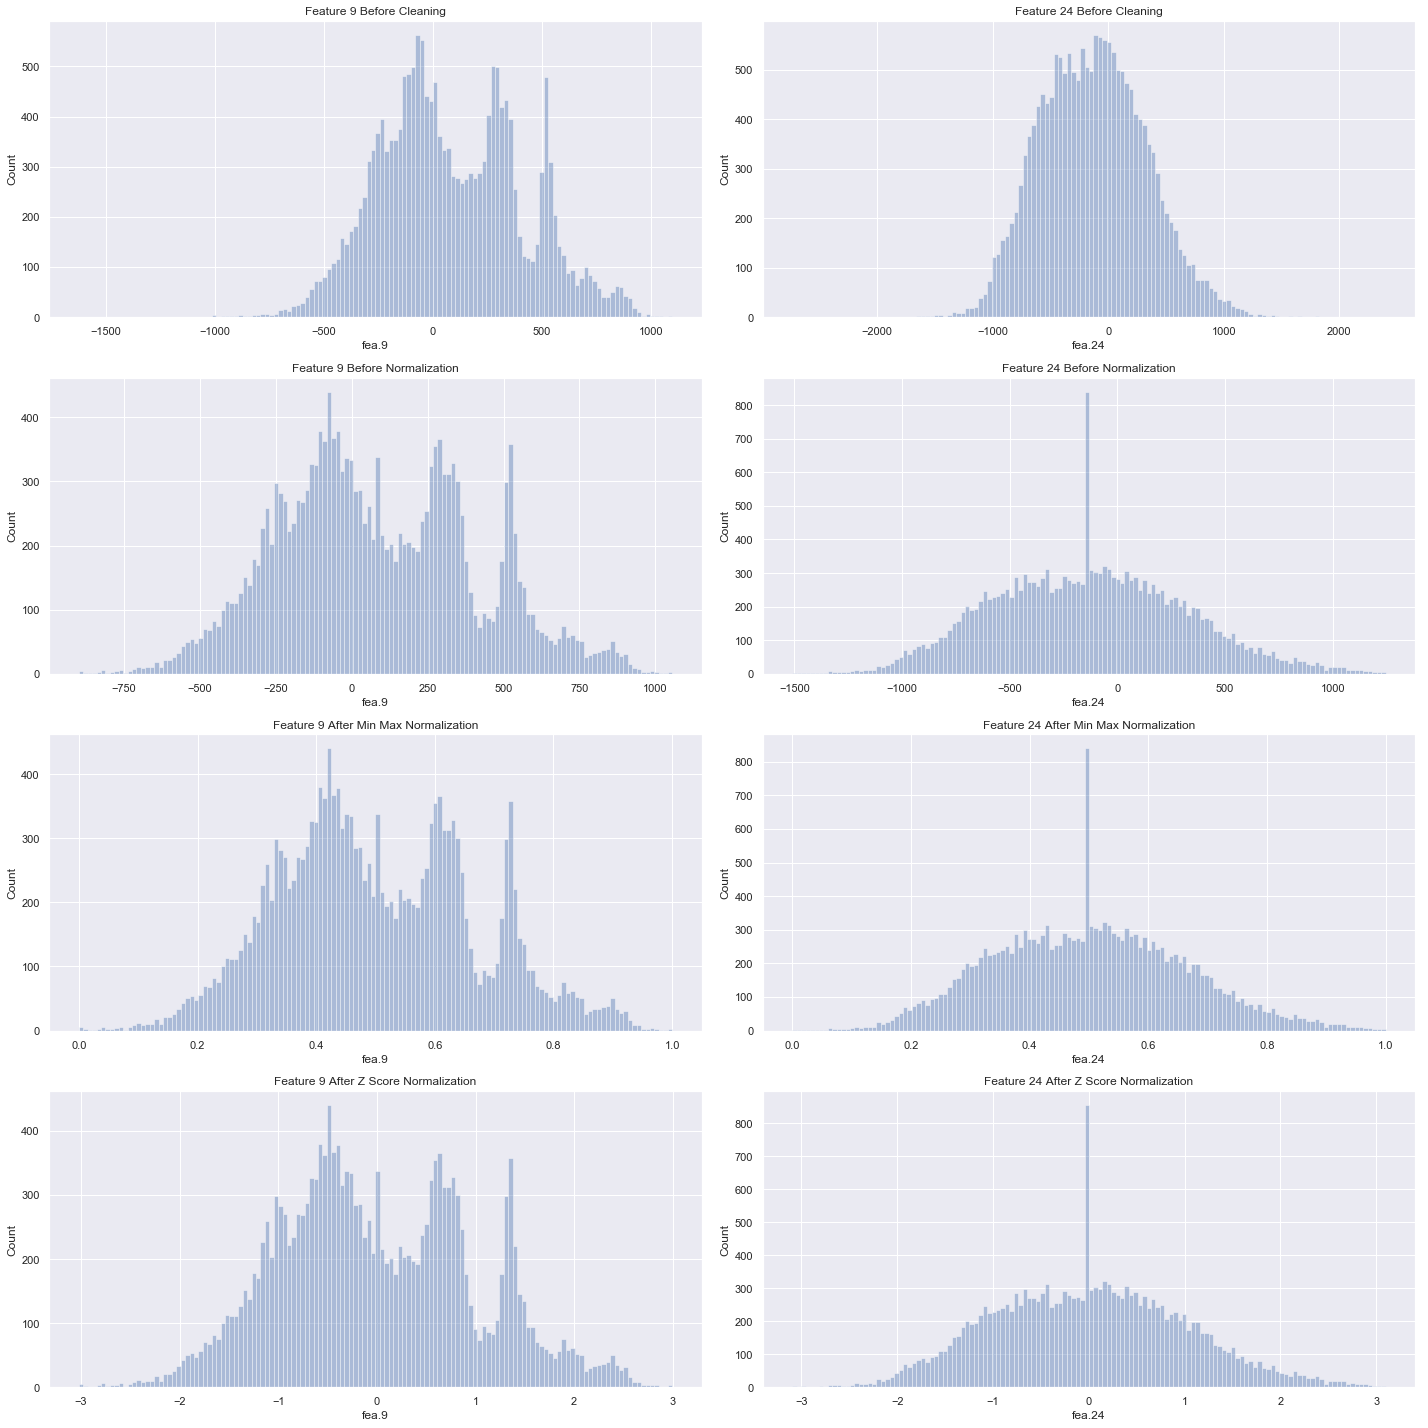

In [12]:
sns.set()
# set figure size and subplot
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1) 
n_bins = int(np.sqrt(len(data.index)))

# plot feature 9 before cleaning
feat9 = data_orig['fea.9'].dropna()
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 Before Cleaning')

# plot feature 24 before cleaning
plt.subplot(4, 2, 2)
feat24 = data_orig['fea.24'].dropna()
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 Before Cleaning')
plt.tight_layout()

# set figure size and subplot
plt.subplot(4, 2, 3)

# plot feature 9 without normalization
feat9 = data['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 Before Normalization')

# plot feature 24 without normalization
plt.subplot(4, 2, 4)
feat24 = data['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 Before Normalization')
plt.tight_layout()

# set figure size and subplot
plt.subplot(4, 2, 5)

# plot feature 9 with min max
feat9 = data_minmax['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 After Min Max Normalization')

# plot feature 24 with min max
plt.subplot(4, 2, 6)
feat24 = data_minmax['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 After Min Max Normalization')
plt.tight_layout()

#set fogure and subplot
plt.subplot(4, 2, 7)

# plot feature 9 with z score
feat9 = data_zscore['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 After Z Score Normalization')

# plot feature 24 with z score
plt.subplot(4, 2, 8)
feat24 = data_zscore['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 After Z Score Normalization')
plt.tight_layout()
plt.savefig(os.path.join('1-3-histograms.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

# II Feature Extraction (for dataset B)

In [13]:
dataB = pd.read_csv('DataB.csv', index_col=0)
dataB_orig = data.copy()
print(dataB.shape)
display(dataB.head(5))

'''separate the feature data from the labels'''
# data
X = dataB.iloc[:,:-1].values
# target
Y = dataB['gnd'].values

(2066, 785)


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81,fea.82,fea.83,fea.84,fea.85,fea.86,fea.87,fea.88,fea.89,fea.90,fea.91,fea.92,fea.93,fea.94,fea.95,fea.96,fea.97,fea.98,fea.99,fea.100,fea.101,fea.102,fea.103,fea.104,fea.105,fea.106,fea.107,fea.108,fea.109,fea.110,fea.111,fea.112,fea.113,fea.114,fea.115,fea.116,fea.117,fea.118,fea.119,fea.120,fea.121,fea.122,fea.123,fea.124,fea.125,fea.126,fea.127,fea.128,fea.129,fea.130,fea.131,fea.132,fea.133,fea.134,fea.135,fea.136,fea.137,fea.138,fea.139,fea.140,fea.141,fea.142,fea.143,fea.144,fea.145,fea.146,fea.147,fea.148,fea.149,fea.150,fea.151,fea.152,fea.153,fea.154,fea.155,fea.156,fea.157,fea.158,fea.159,fea.160,fea.161,fea.162,fea.163,fea.164,fea.165,fea.166,fea.167,fea.168,fea.169,fea.170,fea.171,fea.172,fea.173,fea.174,fea.175,fea.176,fea.177,fea.178,fea.179,fea.180,fea.181,fea.182,fea.183,fea.184,fea.185,fea.186,fea.187,fea.188,fea.189,fea.190,fea.191,fea.192,fea.193,fea.194,fea.195,fea.196,fea.197,fea.198,fea.199,fea.200,fea.201,fea.202,fea.203,fea.204,fea.205,fea.206,fea.207,fea.208,fea.209,fea.210,fea.211,fea.212,fea.213,fea.214,fea.215,fea.216,fea.217,fea.218,fea.219,fea.220,fea.221,fea.222,fea.223,fea.224,fea.225,fea.226,fea.227,fea.228,fea.229,fea.230,fea.231,fea.232,fea.233,fea.234,fea.235,fea.236,fea.237,fea.238,fea.239,fea.240,fea.241,fea.242,fea.243,fea.244,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,fea.257,fea.258,fea.259,fea.260,fea.261,fea.262,fea.263,fea.264,fea.265,fea.266,fea.267,fea.268,fea.269,fea.270,fea.271,fea.272,fea.273,fea.274,fea.275,fea.276,fea.277,fea.278,fea.279,fea.280,fea.281,fea.282,fea.283,fea.284,fea.285,fea.286,fea.287,fea.288,fea.289,fea.290,fea.291,fea.292,fea.293,fea.294,fea.295,fea.296,fea.297,fea.298,fea.299,fea.300,fea.301,fea.302,fea.303,fea.304,fea.305,fea.306,fea.307,fea.308,fea.309,fea.310,fea.311,fea.312,fea.313,fea.314,fea.315,fea.316,fea.317,fea.318,fea.319,fea.320,fea.321,fea.322,fea.323,fea.324,fea.325,fea.326,fea.327,fea.328,fea.329,fea.330,fea.331,fea.332,fea.333,fea.334,fea.335,fea.336,fea.337,fea.338,fea.339,fea.340,fea.341,fea.342,fea.343,fea.344,fea.345,fea.346,fea.347,fea.348,fea.349,fea.350,fea.351,fea.352,fea.353,fea.354,fea.355,fea.356,fea.357,fea.358,fea.359,fea.360,fea.361,fea.362,fea.363,fea.364,fea.365,fea.366,fea.367,fea.368,fea.369,fea.370,fea.371,fea.372,fea.373,fea.374,fea.375,fea.376,fea.377,fea.378,fea.379,fea.380,fea.381,fea.382,fea.383,fea.384,fea.385,fea.386,fea.387,fea.388,fea.389,fea.390,fea.391,fea.392,fea.393,fea.394,fea.395,fea.396,fea.397,fea.398,fea.399,fea.400,fea.401,fea.402,fea.403,fea.404,fea.405,fea.406,fea.407,fea.408,fea.409,fea.410,fea.411,fea.412,fea.413,fea.414,fea.415,fea.416,fea.417,fea.418,fea.419,fea.420,fea.421,fea.422,fea.423,fea.424,fea.425,fea.426,fea.427,fea.428,fea.429,fea.430,fea.431,fea.432,fea.433,fea.434,fea.435,fea.436,fea.437,fea.438,fea.439,fea.440,fea.441,fea.442,fea.443,fea.444,fea.445,fea.446,fea.447,fea.448,fea.449,fea.450,fea.451,fea.452,fea.453,fea.454,fea.455,fea.456,fea.457,fea.458,fea.459,fea.460,fea.461,fea.462,fea.463,fea.464,fea.465,fea.466,fea.467,fea.468,fea.469,fea.470,fea.471,fea.472,fea.473,fea.474,fea.475,fea.476,fea.477,fea.478,fea.479,fea.480,fea.481,fea.482,fea.483,fea.484,fea.485,fea.486,fea.487,fea.488,fea.489,fea.490,fea.491,fea.492,fea.493,fea.494,fea.495,fea.496,fea.497,fea.498,fea.499,fea.500,fea.501,fea.502,fea.503,fea.504,fea.505,fea.506,fea.507,fea.508,fea.509,fea.510,fea.511,fea.512,fea.513,fea

### Standardize the data for better PCA performance

In [14]:
# use z-score standardization to center on mean and scale std to 1
X = preprocessing.StandardScaler().fit_transform(X)
display(pd.DataFrame(X).describe())

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066

## 1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors and eigenvalues

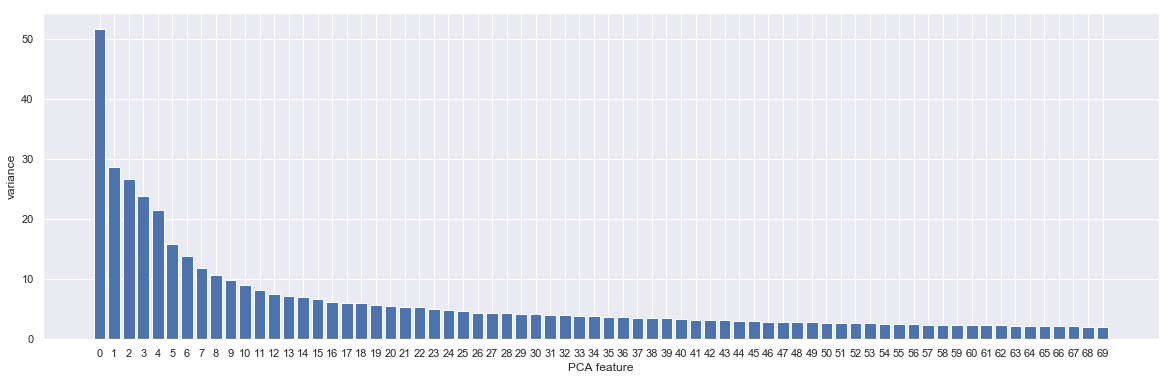

0     51.777319
1     28.800865
2     26.770911
3     23.930346
4     21.575039
5     15.893525
6     13.861941
7     11.912089
8     10.661418
9      9.823583
10     9.113336
11     8.287958
12     7.470221
13     7.186857
14     7.018217
15     6.729239
16     6.171714
17     6.030355
18     5.972188
19     5.745885
20     5.566420
21     5.340855
22     5.309997
23     5.072445
24     4.902200
25     4.740328
26     4.460410
27     4.438758
28     4.375230
29     4.249915
30     4.197361
31     4.131912
32     4.006684
33     3.899598
34     3.821037
35     3.758018
36     3.700872
37     3.572427
38     3.538707
39     3.476093
40     3.378602
41     3.277138
42     3.196151
43     3.187621
44     3.099826
45     3.006451
46     2.956683
47     2.936132
48     2.846674
49     2.804904
50     2.777524
51     2.735662
52     2.730621
53     2.640337
54     2.602419
55     2.565564
56     2.482869
57     2.465466
58     2.438641
59     2.410465
60     2.386027
61     2.344335
62     2

range(0, 70)

In [15]:
# Create a PCA instance: pca
pca = PCA()

# Fit the data
pca.fit(X)

# Plot the explained variances
n = 70
features = range(pca.n_components_)
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(features[:n], pca.explained_variance_[:n])
ax.set_xlabel('PCA feature')
ax.set_ylabel('variance')
ax.set_xticks(features[:n])
plt.savefig(os.path.join('2-1-pcafeatures.png'), dpi=300, format='png')
plt.show()
eigen_values = pd.Series(pca.explained_variance_)
display(eigen_values[:n], features[:n])

In [16]:
# Determine how many features must be kept to retain 95% of the variance
total_variance = np.sum(eigen_values)
num_pca_features_var_retained = []
for num_components in range(X.shape[1]):
    ratio = np.sum(eigen_values[:num_components]) / total_variance
    num_pca_features_var_retained.append(ratio)

list_vars = []    
for num_components, var_ret in enumerate(num_pca_features_var_retained):
    txt = f'number of PCs: {num_components} Variance Ratio: {num_pca_features_var_retained[num_components]}'
    list_vars.append(txt)
    print(txt)


number of PCs: 0 Variance Ratio: 0.0
number of PCs: 1 Variance Ratio: 0.06601053289720794
number of PCs: 2 Variance Ratio: 0.10272854850122919
number of PCs: 3 Variance Ratio: 0.1368585902053613
number of PCs: 4 Variance Ratio: 0.16736721678023686
number of PCs: 5 Variance Ratio: 0.1948730796422608
number of PCs: 6 Variance Ratio: 0.21513562072674805
number of PCs: 7 Variance Ratio: 0.23280811017681516
number of PCs: 8 Variance Ratio: 0.24799474663526438
number of PCs: 9 Variance Ratio: 0.26158691233494524
number of PCs: 10 Variance Ratio: 0.27411092759781547
number of PCs: 11 Variance Ratio: 0.2857294545173872
number of PCs: 12 Variance Ratio: 0.2962957132210888
number of PCs: 13 Variance Ratio: 0.30581944407912626
number of PCs: 14 Variance Ratio: 0.3149819163438531
number of PCs: 15 Variance Ratio: 0.32392939123888026
number of PCs: 16 Variance Ratio: 0.3325084497402178
number of PCs: 17 Variance Ratio: 0.3403767231288787
number of PCs: 18 Variance Ratio: 0.3480647793548495
number o

## 2. Plot a 2 dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).

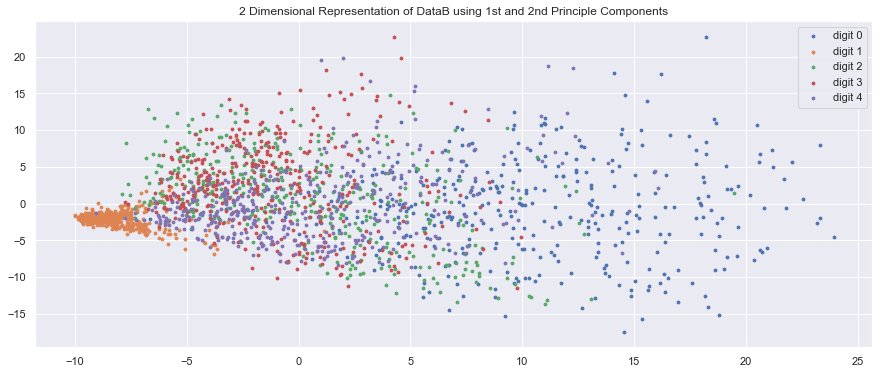

In [17]:
# dimensionality reduction
pca = PCA(n_components=2)

# Fit the data
pca.fit(X)

# Transform the data
transformed = pca.transform(X)

# plot all the digits with a different color
plt.figure(figsize=(15,6))
for c in np.unique(Y):
    xs = transformed[:,0][Y==c]
    ys = transformed[:,1][Y==c]
    plt.scatter(xs, ys, s=8)
plt.legend(['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4'])
plt.title('2 Dimensional Representation of DataB using 1st and 2nd Principle Components')
plt.savefig(os.path.join('2-2-dimreduction_pca1_2.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

## 3. Repeat step 2 for the 5th and 6th components. Comment on the result.

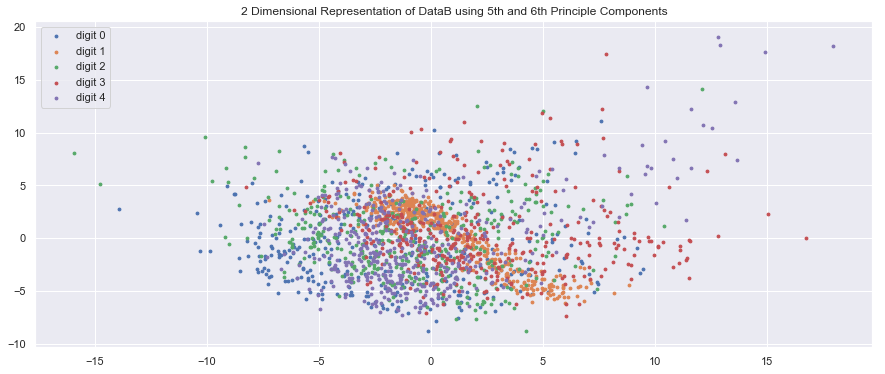

In [18]:
# dimensionality reduction
pca = PCA()

# Fit the data
pca.fit(X)

# Get the 5th and 6th components (eigenvectors)
Hm = pca.components_[5:7] #eigenvectors

# Bm = X @ Hm.T  # transformed values

# Transform the data
transformed = X @ Hm.T


# plot all the digits with a different color
plt.figure(figsize=(15,6))
for c in np.unique(Y):
    xs = transformed[:,0][Y==c]
    ys = transformed[:,1][Y==c]
    plt.scatter(xs, ys, s=8)
plt.legend(['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4'])
plt.title('2 Dimensional Representation of DataB using 5th and 6th Principle Components')
plt.savefig(os.path.join('2-3-dimreduction_pca5_6.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [19]:
# find the variance information contained in the first two PCAs vs the 5th and 6th
print('Variance in PCA 1 + PCA 2 = ', num_pca_features_var_retained[2])
print('Variance in PCA 5 + PCA 6 = ', num_pca_features_var_retained[6]-num_pca_features_var_retained[4])

Variance in PCA 1 + PCA 2 =  0.10272854850122919
Variance in PCA 5 + PCA 6 =  0.04776840394651119


## 4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error for the 8 sets against the retained variance of each case.

In [20]:
# create 8 sets of dimensionality reduced data

X_dim_reduced = []
dim_sets = [2, 4, 10, 30, 60, 200, 500, 784]

for n_components in dim_sets:
    pca = PCA(n_components=n_components)
    X_dim_reduced.append(pca.fit_transform(X))

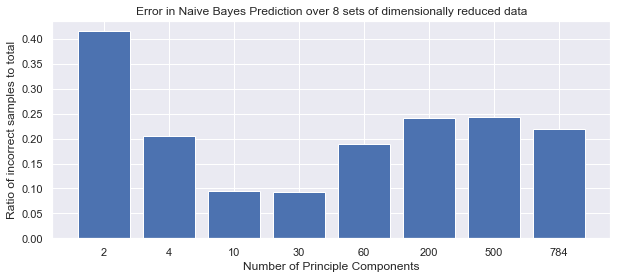

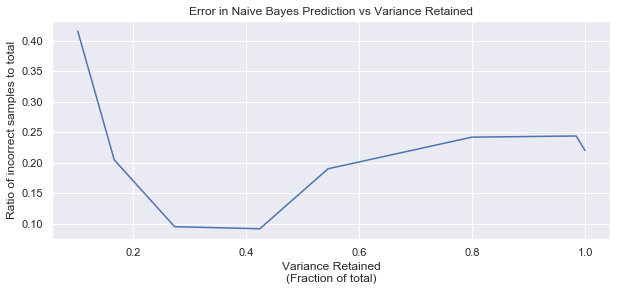

In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# gaussian naive bayes classifier
gnb = GaussianNB()
#gnb = MultinomialNB()

classification_error = []
var_retained = [num_pca_features_var_retained[x] for x in [2, 4, 10, 30, 60, 200, 500, 783]]

for x in X_dim_reduced:  
    y_pred = gnb.fit(x, Y).predict(x)
    error = (Y != y_pred).sum() / x.shape[0]
    classification_error.append(error)

fig, ax = plt.subplots(figsize = (10,4))
ax.bar(range(8), classification_error)
ax.set_xticks(range(8))
ax.set_xticklabels(dim_sets)
ax.set_xlabel('Number of Principle Components')
ax.set_ylabel('Ratio of incorrect samples to total')
ax.set_title('Error in Naive Bayes Prediction over 8 sets of dimensionally reduced data')
plt.savefig(os.path.join('2-4-NBprediction_bar.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize = (10,4))
ax.plot(var_retained, classification_error)
ax.set_xlabel('Variance Retained\n(Fraction of total)')
ax.set_ylabel('Ratio of incorrect samples to total')
ax.set_title('Error in Naive Bayes Prediction vs Variance Retained')
plt.savefig(os.path.join('2-4-NBprediction_line.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

We can see that the error of the naive bayes classifer error decreases as the PCA components increase, up to a point.

## 5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA) to reduce the dimensionality, plot the data points using the first 2 LDA components (display data points of each class with a different color). Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA

(2066, 2)


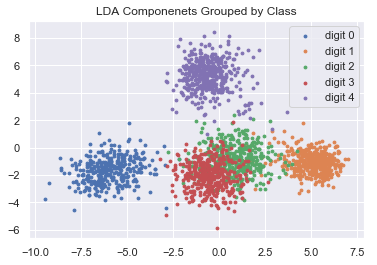

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2)
data_projected = LDA.fit_transform(X,Y)
print(data_projected.shape)

for label in np.unique(Y):
    xs = data_projected[:,0][Y==label]
    ys = data_projected[:,1][Y==label]
    plt.scatter(xs, ys, s=8)
plt.legend(['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4'])
plt.title('LDA Componenets Grouped by Class')
plt.savefig(os.path.join('2-5-LDA_dim_reduction.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

# III. Nonlinear Dimensionality Reduction (for dataset B)

Apply the nonlinear dimensionality reduction methods Locally Linear Embedding (LLE) and ISOMAP
to the dataset B, set the number of nearest neighbours to be 5, the projected low dimension to be
4.

In [23]:
# source/credit: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# source/credit: https://www.programcreek.com/python/example/102441/matplotlib.offsetbox.AnnotationBbox

from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


# get the subset of dataB where the digit is 3
X_dig3 = dataB.values[:,:-1][Y==3]
X_dig3_scaled = preprocessing.StandardScaler().fit_transform(X_dig3)
Y_dig3 = Y[Y==3]

sns.reset_orig()

# helper function to embed images in a plot
def plot_embedding(X_map, X_image, title=None, frameon=False):
    x_min, x_max = np.min(X_map, 0), np.max(X_map, 0)
    X_map = (X_map - x_min) / (x_max - x_min)
    
    fig = plt.figure(figsize=(20,12))
    ax = fig.add_subplot(111)
    
    # plot original image of '3' at each position in the mapping
    for i in range(X_map.shape[0]):
        im = offsetbox.OffsetImage(X_image[i].reshape((28,28)), zoom=0.5, cmap=plt.cm.gray_r)
        im.image.axes = ax
        xy = list(X_map[i,:])
        ab = offsetbox.AnnotationBbox(
                            im, xy,
                            xycoords='data',
                            box_alignment=(0.5,0.5),
                            frameon=frameon)
        ax.add_artist(ab)
        
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    if title:
        ax.set_title(title)
    return plt.gcf()

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


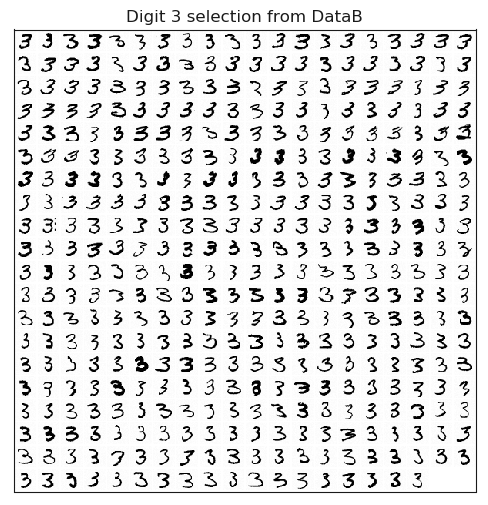

In [24]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((30 * n_img_per_row, 30 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 30 * i + 1
    for j in range(n_img_per_row):
        iy = 30 * j + 1
        img_count = i*n_img_per_row + j
        if img_count < X_dig3.shape[0]:
            img[ix:ix + 28, iy:iy + 28] = X_dig3[img_count, :].reshape((28, 28))
        else:
            img[ix:ix + 28, iy:iy + 28] = np.zeros((28,28))
plt.figure(figsize=(6,6))

plt.xticks([])
plt.yticks([])
plt.title('Digit 3 selection from DataB')
plt.imsave(os.path.join('3-0-alldigit3.png'), img, cmap=plt.cm.binary)
plt.imshow(img, cmap=plt.cm.binary)


### 1. Apply LLE to the images of digit '3' only. Visualize the original images by plotting the images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE, see Figure for an example of what this looks like for random location of images on of the number 1-3. Describe qualitatively what kind of variations is captured.

Computing LLE embedding


C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


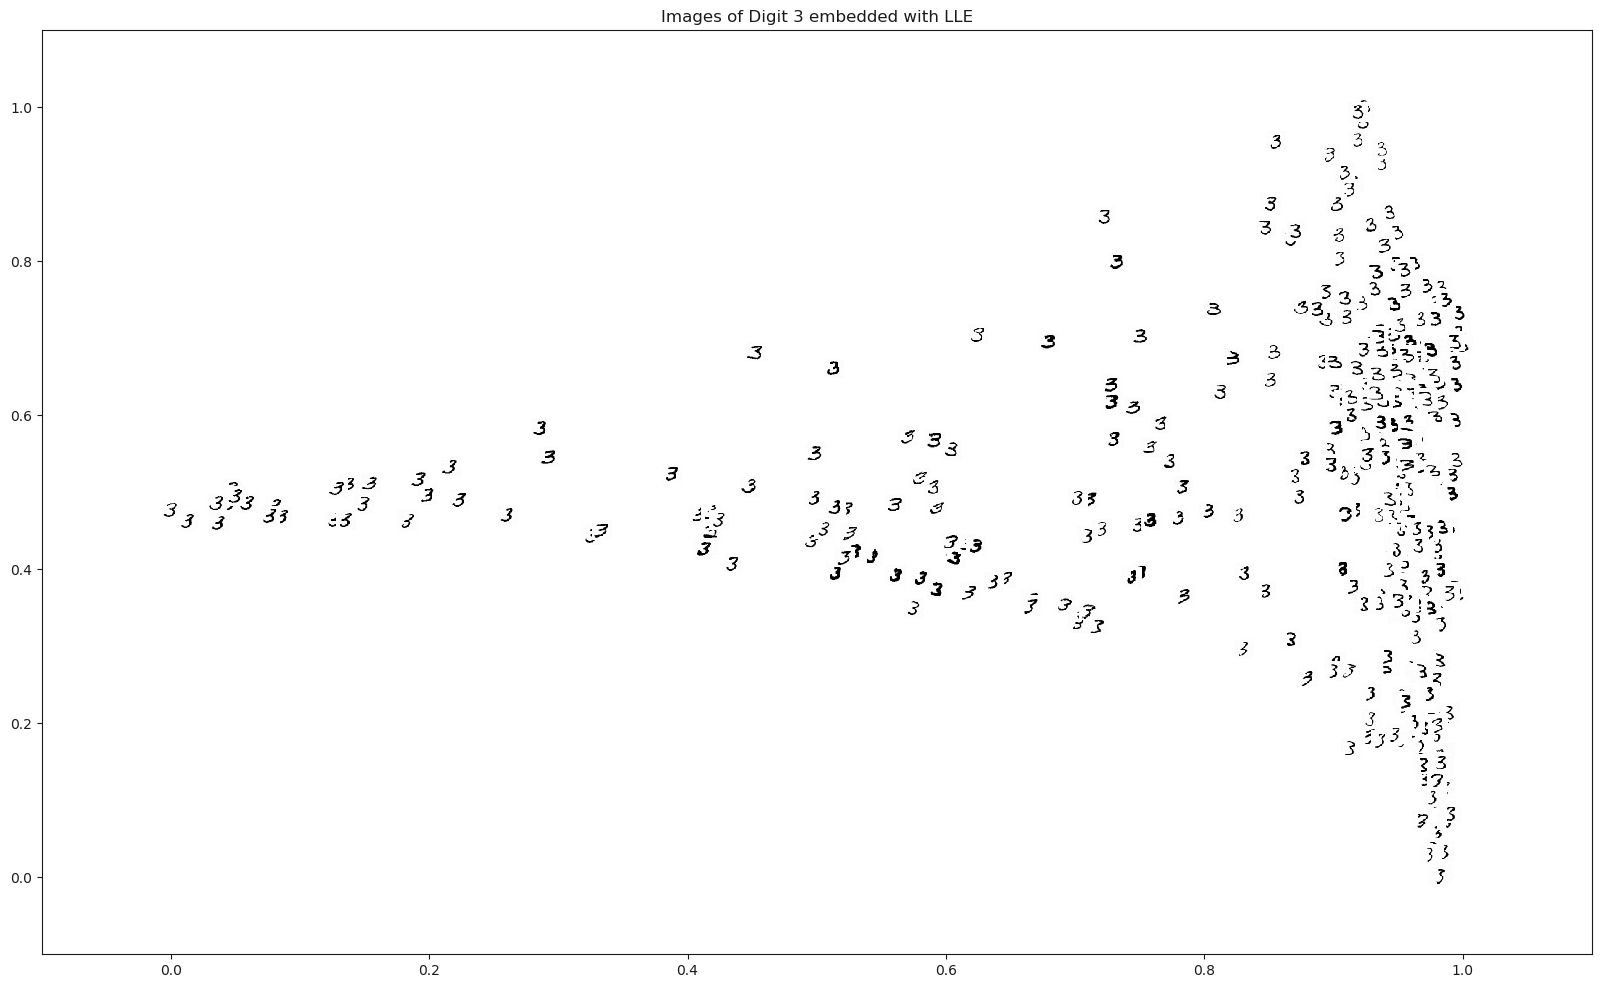

In [25]:
n_neighbors = 5

t0 = time()

clf = manifold.LocallyLinearEmbedding(n_neighbors = 5, n_components=2, eigen_solver='dense', method='standard')

# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
X_lle = clf.fit_transform(X_dig3_scaled)
lle_fig = plot_embedding(X_lle, X_dig3, 'Images of Digit 3 embedded with LLE')
lle_fig.savefig(os.path.join('3-1-LLEembedding.png'), dpi=300, format='png')
lle_fig.show()

### 2.Repeat step 1 using the ISOMAP method.  Comment on the result.  Does ISOMAP do better in some way?  Are the patterns being found globally based or locally based?

C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


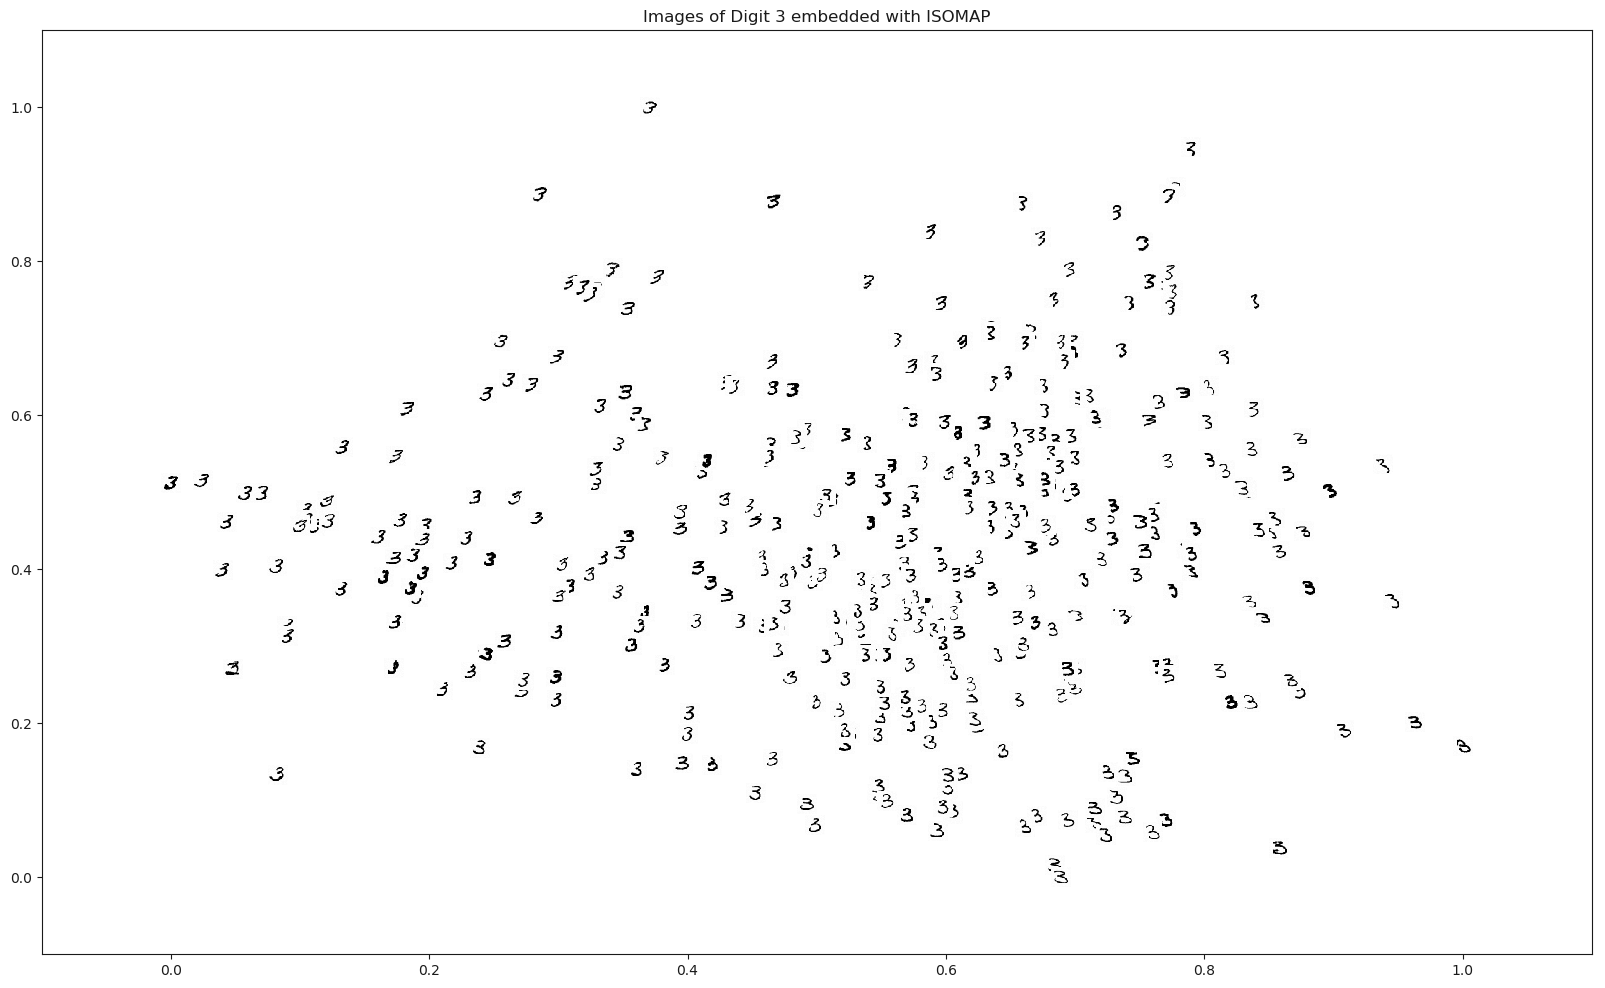

In [26]:

iso = manifold.Isomap(n_neighbors, n_components=2)
X_iso = iso.fit_transform(X_dig3_scaled)

iso_fig = plot_embedding(X_iso, X_dig3, 'Images of Digit 3 embedded with ISOMAP')
iso_fig.savefig(os.path.join('3-2-ISOMAPembedding.png'), dpi=300, format='png')
iso_fig.show()

### 3. Use the Naive Bayes classifier to classify the dataset based on the projected 4-dimension representations of the LLE and ISOMAP. Train your classifier by randomly selected 70% of data, and test with remained 30%. Retrain for multiple iterations (using different random partitions of the data) and use the average accuracy of multiple runs for your analysis. Justify why your number of iterations was suficient. Based on the average accuracies compare their performance with PCA and LDA. Discuss the result.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

dataX = dataB.values[:,:-1]
Y = dataB.values[:,-1]
X = preprocessing.StandardScaler().fit_transform(dataX)
seed = 111

# model objects
iso = manifold.Isomap(n_neighbors=5, n_components=4)
clf = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=4, eigen_solver='dense', method='standard')
pca = PCA(n_components=4)
lda = LinearDiscriminantAnalysis(n_components=4)
gnb = GaussianNB()

# set initial random seed for repeatability
np.random.seed(seed)

iso_performance = []
lle_performance = []
pca_performance = []
lda_performance = []
X_iso = iso.fit_transform(X)
X_clf = clf.fit_transform(X)
X_pca = pca.fit_transform(X)
X_lda = lda.fit_transform(X,Y)


# test performance of predictions over 30 random permuatations
for _ in range(30):
    rand_state = np.random.get_state()
    X_train, X_test, y_train, y_test = train_test_split(X_iso, Y, test_size=0.3)

    model = gnb.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    iso_performance.append(score)

    # set the random state to the same as the previous so that the train test split will be the same between models
    np.random.set_state(rand_state)
    X_train, X_test, y_train, y_test = train_test_split(X_clf, Y, test_size=0.3)

    model = gnb.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    lle_performance.append(score)
    
    # pca performance
    np.random.set_state(rand_state)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3)

    model = gnb.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    pca_performance.append(score)
    
    # lda performance
    np.random.set_state(rand_state)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, Y, test_size=0.3)

    model = gnb.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    lda_performance.append(score)

print(f'4 dimsenional ISOMAP predicts with {np.mean(iso_performance):.3f} accuracy and {np.std(iso_performance):.3f} standard deviation')
print(f'4 dimsenional LLE predicts with {np.mean(lle_performance):.3f} accuracy and {np.std(lle_performance):.3f} standard deviation')
print(f'4 dimsenional PCA predicts with {np.mean(pca_performance):.3f} accuracy and {np.std(pca_performance):.3f} standard deviation')
print(f'4 dimsenional LDA predicts with {np.mean(lda_performance):.3f} accuracy and {np.std(lda_performance):.3f} standard deviation')

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


4 dimsenional ISOMAP predicts with 0.804 accuracy and 0.011 standard deviation
4 dimsenional LLE predicts with 0.867 accuracy and 0.012 standard deviation
4 dimsenional PCA predicts with 0.788 accuracy and 0.010 standard deviation
4 dimsenional LDA predicts with 0.994 accuracy and 0.003 standard deviation
